In [1]:
import sys
sys.path.append('../')
import torch
import numpy as np

In [2]:
from mdn_propagator.propagator import Propagator

In [3]:
dihedrals_data = np.load('data/alanine-dipeptide-3x250ns-backbone-dihedrals.npz')

In [4]:
phi_psi_data = [dihedrals_data['arr_0'], dihedrals_data['arr_1'], dihedrals_data['arr_2']]
len(phi_psi_data), phi_psi_data[0].shape

(3, (250000, 2))

In [5]:
phi_psi_data = [torch.tensor(p).float() for p in phi_psi_data]

In [8]:
model = Propagator(dim = phi_psi_data[0].size(1), lr = 1e-2)

In [9]:
model.fit(phi_psi_data, lag = 1, max_epochs=100)

/project/andrewferguson/Kirill/class_project_env/lib/python3.7/site-packages/lightning_lite/plugins/environments/slurm.py:170: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /project/andrewferguson/Kirill/class_project_env/lib ...
  category=PossibleUserWarning,
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type                  | Params
--------------------------------------------------
0 | mdn     | MixtureDensityNetwork | 33.0 K
1 | _scaler | MinMaxScaler          | 0     
--------------------------------------------------
33.0 K    Trainable params
0         Non-trainable params
33.0 K    Total params
0.132     Total estimated model params size (MB)
/project/andrewferguson/Kirill/class_project_env/lib/python3.7/site-p

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


Propagator(
  (mdn): MixtureDensityNetwork(
    (network): MLP(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=128, bias=True)
        (1): SiLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): SiLU()
        (4): Linear(in_features=128, out_features=125, bias=True)
      )
    )
  )
  (_scaler): MinMaxScaler()
)

In [10]:
x = phi_psi_data[0][0][None]

In [11]:
pred_phi_psi = model.gen_synthetic_traj(x, int(np.concatenate(phi_psi_data).shape[0]))

  0%|          | 0/750000 [00:00<?, ?it/s]

In [12]:
import pyemma
import matplotlib.pyplot as plt

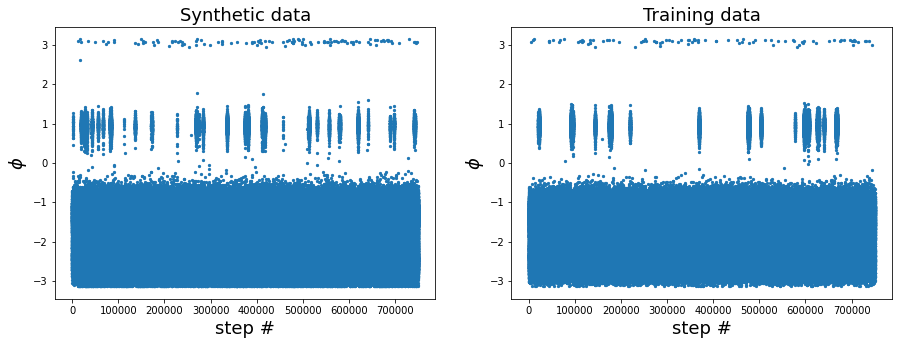

In [13]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

axes[0].scatter(np.arange(pred_phi_psi[:, 0].shape[0]), pred_phi_psi[:, 0], s=5)
axes[0].set_title('Synthetic data', fontsize=18)

axes[1].scatter(np.arange(np.concatenate(phi_psi_data)[:, 0].shape[0]), np.concatenate(phi_psi_data)[:, 0], s=5)
axes[1].set_title('Training data', fontsize=18)

for ax in axes:
    ax.set_xlabel('step #', fontsize=18)
    ax.set_ylabel('$\phi$', fontsize=18)


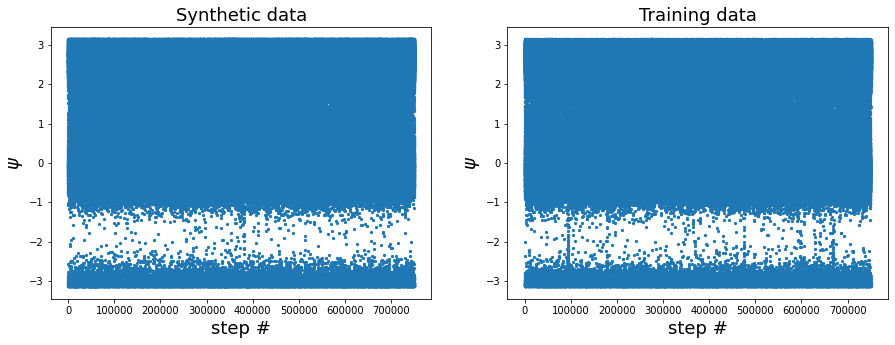

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

axes[0].scatter(np.arange(pred_phi_psi[:, 1].shape[0]), pred_phi_psi[:, 1], s=5)
axes[0].set_title('Synthetic data', fontsize=18)

axes[1].scatter(np.arange(np.concatenate(phi_psi_data)[:, 1].shape[0]), np.concatenate(phi_psi_data)[:, 1], s=5)
axes[1].set_title('Training data', fontsize=18)

for ax in axes:
    ax.set_xlabel('step #', fontsize=18)
    ax.set_ylabel('$\psi$', fontsize=18)


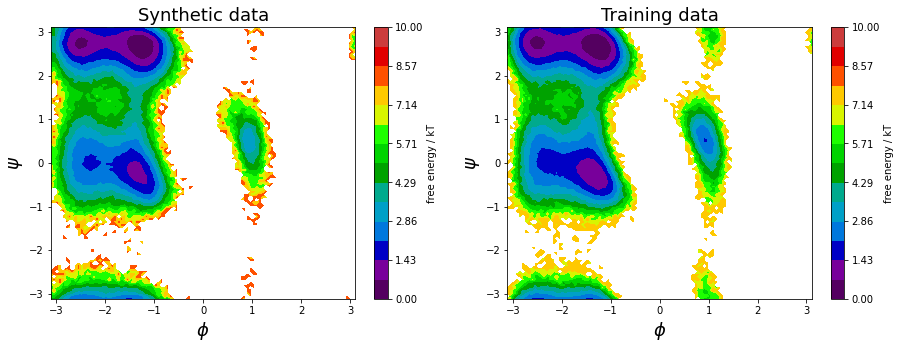

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

pyemma.plots.plot_free_energy(*pred_phi_psi.numpy().T, levels=np.linspace(0, 10, 15), ax=axes[0])
pyemma.plots.plot_free_energy(*np.concatenate(phi_psi_data).T, levels=np.linspace(0, 10, 15), ax=axes[1])

axes[0].set_title('Synthetic data', fontsize=18)
axes[1].set_title('Training data', fontsize=18)

for ax in axes:
    ax.set_xlabel('$\phi$', fontsize=18)
    ax.set_ylabel('$\psi$', fontsize=18)